#### Packages

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import chisquare
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

# Problem 1 --- Wholesale Customer Analysis

In [25]:
Wholesale_DF = pd.read_csv(r"C:\Users\adisr\Downloads\Wholesale+Customers+Data.csv")
Wholesale_DF.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [26]:
# General stats of the dataset:
Wholesale_DF.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# Missing value checks :

In [27]:
Wholesale_DF.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

This means that the dataset is complete and no variable has any missing values

### SOLUTION 1.1

In [28]:
# Use methods of descriptive statistics to summarize data. 
# Which Region and which Channel spent the most? 
# Which Region and which Channel spent the least?

To find counts of region-wise spends

In [29]:
Region_groupby = Wholesale_DF.groupby('Region')[['Channel']].count()
Region_groupby.head()

,Channel
Region,
Lisbon,77
Oporto,47
Other,316


To find Channel-wise spends

In [30]:
Channel_groupby = Wholesale_DF.groupby('Channel')[['Region']].count()
Channel_groupby.head()

,Region
Channel,
Hotel,298
Retail,142


<AxesSubplot:xlabel='count', ylabel='Region'>

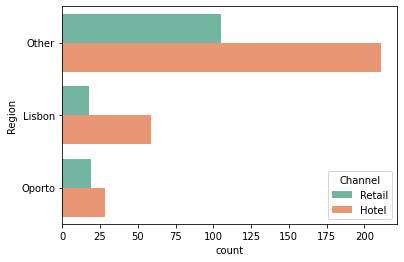

In [31]:
sns.countplot(y="Region", hue="Channel", data = Wholesale_DF, palette = "Set2")

Result ->

The summary here does not include the monetary value of the channel or the regional spends.
It purely encompasses the tally of spends altogether. 

Out of the 3 regions in the dataset, only the unspecified region "other" records the highest number of spends in both retail and hotel. 
Oporto on the other hand reords the least over all sales.



### SOLUTION 1.2

In [32]:
# There are 6 different varieties of items that are considered. 
# Describe and comment/explain all the varieties across Region and Channel? 
# Provide a detailed justification for your answer.

##### Varieties accross Channel 

In [35]:
Ch_grp_df = Wholesale_DF.groupby(['Channel'])
Ch = Ch_grp_df.sum()
Ch

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,,
Hotel,71034,4015717,1028614,1180717,1116979,235587,421955
Retail,25986,1264414,1521743,2317845,234671,1032270,248988


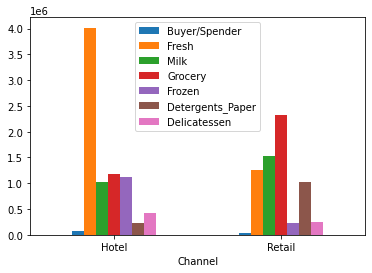

In [36]:
ax = Ch.plot.bar(rot=0)

##### Varieties accross Region

In [37]:
Reg_grp_df = Wholesale_DF.groupby(['Region'])
Reg_grp_df.sum()


,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,,
Lisbon,18095,854833,422454,570037,231026,204136,104327
Oporto,14899,464721,239144,433274,190132,173311,54506
Other,64026,3960577,1888759,2495251,930492,890410,512110


##### Behaviour of the Product varieties can me mostly observed from the maxima and minima. Also their inter-quartile range.


In [38]:
Wholesale_DF.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Clearly, "Fresh" have the highest standard deviation when compared to "Detergents_Paper".
Here I plan on taking these two varieties as a case study to explore more. 
Let us Compare their Coefficients of variation.


In [39]:
Fresh_mean = 12000.297727
Fresh_std = 12647.328865
Fresh_CV = Fresh_std/Fresh_mean
Fresh_CV

1.0539179237648593

In [40]:
det_pap_mean = 2881.493182
det_pap_std = 4767.854448
det_pap_CV = det_pap_std/det_pap_mean
det_pap_CV

1.6546471384293562

Fresh_CV > det_pap_CV 

Observation:
    
    Variation in "Detergents_Paper" is higher than that of "Fresh"
    

### SOLUTION 1.3

In [41]:
# On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour?
# Which items show the least inconsistent behaviour?

Whenever it comes to variability, the coefficient of variance does the best in terms of measuring that. 
In the previous question, I have calculated the coefficient of variance for only two of the varieties. 
Here we will look at all varieties at once. 

In [42]:
CV_TOTAL = lambda x: np.std(x, ddof=1) / np.mean(x) * 100
CV_TOTAL(Wholesale_DF)

Buyer/Spender        57.669531
Fresh               105.391792
Milk                127.329858
Grocery             119.517437
Frozen              158.033238
Detergents_Paper    165.464714
Delicatessen        184.940690
dtype: float64

Observation: 
    
Maximum inconsistency is observed in Delicatessen products and the least inconsistency is observed in Fresh products. 

### SOLUTION 1.4

In [43]:
# Are there any outliers in the data?
# Back up your answer with a suitable plot/technique with the help of detailed comments.

In [44]:
del Wholesale_DF['Buyer/Spender']

In [45]:
del Wholesale_DF['Region']
del Wholesale_DF['Channel']

In [46]:
Q1 = Wholesale_DF.quantile(0.25)
Q3 = Wholesale_DF.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Fresh               13806.00
Milk                 5657.25
Grocery              8502.75
Frozen               2812.00
Detergents_Paper     3665.25
Delicatessen         1412.00
dtype: float64


In [47]:
outliers = (Wholesale_DF < (Q1 - 1.5 * IQR)) |(Wholesale_DF > (Q3 + 1.5 * IQR))
outliers
# If True, then we clearly have a presence of outliers.
 

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,True
3,False,False,False,False,False,False
4,False,False,False,False,False,True
...,...,...,...,...,...,...
435,False,False,False,True,False,False
436,True,False,False,False,False,False
437,False,False,True,False,True,False
438,False,False,False,False,False,False


<AxesSubplot:>

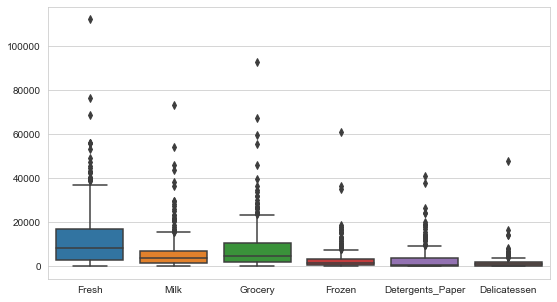

In [48]:
# We can additionally check for outliers with the help of a box plot 
# Box Plots help identify mainy two measures of variability. Range and inter-quartile range. 

sns.set_style("whitegrid")
a4_dims = (9, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot( data = Wholesale_DF)

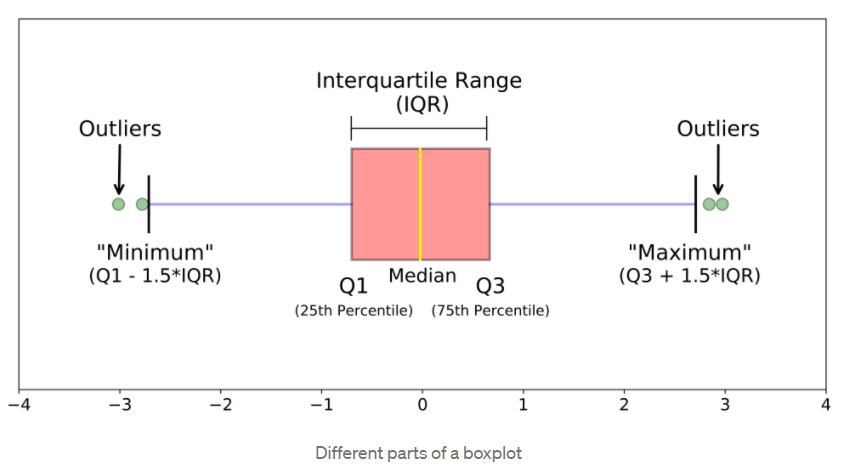

In [49]:
from IPython.display import Image
Image(filename= r'C:\Users\adisr\Pictures\Box_plot.png')

# Image source =  https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

#### Comments and Observations:

From the reference image above on how to read a simple box plot,
we can see that every variable has datapoints beyond their whiskers

Which means that all products sold have very high variability. 
Box plots however do not identify the actual indexes of the outlying observations.
To identify this, we can use the Turkey fence box-plot method. 


### SOLUTION 1.5

In [50]:
#On the basis of your analysis, what are your recommendations for the business? 
#How can your analysis help the business to solve its problem? Answer from the business perspective

As this is sales data with a compartive study between regions and channel of sales.
A dataset with many outliers or extreme data points will pull the calculated mean from the actual mean. 
This can result in skewed or inaccturate results. 
Minimising overall variance by employing reliable data collection menthods can drastically reduce the variance. 

# Problem 2 --- Student survey analysis

In [51]:
Student_DF = pd.read_csv(r"C:\Users\adisr\Downloads\Survey-1.csv")
Student_DF.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [52]:
Student_DF.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


### SOLUTION 2.1

In [53]:
# construct the following contingency tables (Keep Gender as row variable)

In [54]:
# 2.1.1 ) Gender and Major
GenMajor_DF = pd.crosstab(Student_DF['Gender'], Student_DF['Major'],margins = False)
GenMajor_DF

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [55]:
# 2.1.2 ) Gender and Grad Intention
GenGraINT_DF = pd.crosstab(Student_DF['Gender'], Student_DF['Grad Intention'],margins = False)
GenGraINT_DF

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [56]:
# 2.1.3 ) Gender and Employment
GenEmp_DF = pd.crosstab(Student_DF['Gender'], Student_DF['Employment'],margins = False)
GenEmp_DF

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [57]:
# 2.1.4) Gender and Computer
GenComp_DF = pd.crosstab(Student_DF['Gender'], Student_DF['Computer'],margins = False)
GenComp_DF

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


### SOLUTION 2.2

In [58]:
# Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
# 2.2.1.>> What is the probability that a randomly selected CMSU student will be male?

Student_DF['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [97]:
tot_males = 29 
students = 62 
P_male = tot_males/students
print("Probability of a randomly selected CMSU student is male = ",  P_male)

Probability of a randomly selected CMSU student is male =  0.46774193548387094


In [60]:
# 2.2.2 >> What is the probability that a randomly selected CMSU student will be female?
tot_females = 33 
students = 62 
P_females = tot_females/students
print("Probability of a randomly selected CMSU student is female = ",  P_females)

Probability of a randomly selected CMSU student is female =  0.532258064516129


### SOLUTION 2.3

In [61]:
# Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

# 2.3.1. Find the conditional probability of different majors among the male students in CMSU.
GenMajor_DF

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [62]:
male_Acc = 4
males_CIS = 1
males_eco = 4
males_InB = 2
males_man = 6
males_other = 4
males_retMkt = 5
males_undecided = 3 

In [63]:
P_male_Ac = male_Acc /tot_males
print("Probability of a male cmsu student studying accounting = " , P_male_Ac)

Probability of a male cmsu student studying accounting =  0.13793103448275862


In [64]:
P_males_CIS = males_CIS/tot_males
print("Probability of a male cmsu student studying CIS = " ,P_males_CIS)

Probability of a male cmsu student studying CIS =  0.034482758620689655


In [65]:
P_males_eco = males_eco/tot_males
print("Probability of a male cmsu student studying economics/finance = ",P_males_eco)

Probability of a male cmsu student studying economics/finance =  0.13793103448275862


In [66]:
P_males_InB = males_InB/tot_males
print("Probability of a male cmsu student studying international business = " ,P_males_InB)

Probability of a male cmsu student studying international business =  0.06896551724137931


In [67]:
P_males_man = males_man/tot_males
print("Probability of a male cmsu student studying management = ",P_males_man)

Probability of a male cmsu student studying management =  0.20689655172413793


In [68]:
P_males_other = males_other/tot_males
print("Probability of a male cmsu student studying other = ", P_males_other)

Probability of a male cmsu student studying other =  0.13793103448275862


In [69]:
P_males_retMkt = males_retMkt/tot_males
print("Probability of a male cmsu student studying retail/marketing= " , P_males_retMkt)

Probability of a male cmsu student studying retail/marketing=  0.1724137931034483


In [70]:
P_males_undecided = males_undecided/tot_males
print("Probability of a male cmsu student not deciding what to study = " ,P_males_undecided)

Probability of a male cmsu student not deciding what to study =  0.10344827586206896


In [71]:
# 2.3.2 Find the conditional probability of different majors among the female students of CMSU.
GenMajor_DF

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [72]:
female_Acc = 3
females_CIS = 3
females_eco = 7
females_InB = 4
females_man = 4
females_other = 3
females_retMkt = 9
females_undecided = 0

In [73]:
P_female_Acc = female_Acc /tot_females
print("Probability of a female cmsu student studying accounting = " , P_female_Acc)

Probability of a female cmsu student studying accounting =  0.09090909090909091


In [74]:
P_females_CIS = females_CIS/tot_females
print("Probability of a female cmsu student studying CIS = " ,P_females_CIS)

Probability of a female cmsu student studying CIS =  0.09090909090909091


In [75]:
P_females_eco = females_eco/tot_females
print("Probability of a female cmsu student studying economics/finance = ",P_females_eco)

Probability of a female cmsu student studying economics/finance =  0.21212121212121213


In [76]:
P_females_InB = females_InB/tot_females
print("Probability of a female cmsu student studying international business = " ,P_females_InB)

Probability of a female cmsu student studying international business =  0.12121212121212122


In [77]:
P_females_man = females_man/tot_females
print("Probability of a female cmsu student studying management = ",P_females_man)

Probability of a female cmsu student studying management =  0.12121212121212122


In [78]:
P_females_other = females_other/tot_females
print("Probability of a female cmsu student studying other = ", P_females_other)

Probability of a female cmsu student studying other =  0.09090909090909091


In [79]:
P_females_retMkt = females_retMkt/tot_females
print("Probability of a female cmsu student studying retail/marketing= " , P_females_retMkt)

Probability of a female cmsu student studying retail/marketing=  0.2727272727272727


In [80]:
P_females_undecided = females_undecided/tot_females
print("Probability of a female cmsu student not deciding what to study = " ,P_females_undecided)

Probability of a female cmsu student not deciding what to study =  0.0


### SOLUTION 2.4

In [81]:
# Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:
#2.4.1. Find the probability that a randomly chosen student is a male and intends to graduate.
GenGraINT_DF

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [82]:
males_graduating = 17
P_males_graduating = males_graduating/tot_males
#P_males_graduating
P_male_intent_grad = P_male * P_males_graduating
print("Probability that a randomly chosen student is a male and intends to graduate = ", P_male_intent_grad)

Probability that a randomly chosen student is a male and intends to graduate =  0.27419354838709675


In [83]:
# 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 
GenComp_DF

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [84]:
#female_noLaptop = 4
#P_female_noLaptop  = female_noLaptop /females
#P_female_noLaptop

In [89]:
female_desk = 2
female_tablet = 2
P_female_desk = female_desk/tot_females
P_female_desk

0.06060606060606061

In [90]:
P_female_tablet = female_tablet/tot_females
P_female_tablet

0.06060606060606061

In [91]:
P_female_comp_combined = P_female_tablet + P_female_desk
P_female_comp_combined

0.12121212121212122

In [92]:
P_female_noLaptop = P_female_comp_combined * P_females
print("Probability of a randomly selected student is female with no laptop = ",P_female_noLaptop)

Probability of a randomly selected student is female with no laptop =  0.06451612903225806


### SOLUTION 2.5

In [93]:
# Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

# >> 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?
GenEmp_DF

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


Here, the randomly chosen student

a) can either be a male

b) student can have full time employyment

In [94]:
# we already know that the probability of a randomly chosen student being a male is
P_male

0.46774193548387094

In [98]:
#Let us calculate the probability of only fully employed male students
males_fullemp = 7
P_males_fullemp = males_fullemp/students
P_males_fullemp

0.11290322580645161

In [101]:
#Let us calculate the probability of a student from CMSU being fully employes. 
# This means Males + Females that are fully employed 

fulltime_student = 10    #(3 female+ 7 male)
tot_students = 62
P_fulltime_student = fulltime_student/tot_students
P_fulltime_student

0.16129032258064516

In [102]:
# Finally, as the probability of fully employed males are also included in the probability of fully employed students

P = (P_fulltime_student + P_male) -(P_males_fullemp)
print("probability that a randomly chosen student is a male or has full-time employment = " , P)

probability that a randomly chosen student is a male or has full-time employment =  0.5161290322580645


In [103]:
#2.5.2. Find the conditional probability that given a female student is randomly chosen, 
#she is majoring in international business or management.

In [104]:
#Let us look and the gender and major distribution of students again
GenMajor_DF

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [105]:
# Here, the selected student is already a female. So now within the the group of females, we need to calculate the probability 
#that the selected female is either majoring in International Business or in Management

In [106]:

female_man = 4
P_female_man = female_man/tot_females
print("Probability of a female student studying management = " , P_female_man)

Probability of a female student studying management =  0.12121212121212122


In [107]:
females_InB = 4
P_females_InB = females_InB/tot_females
print("Probability of a female student studying International Business = " , P_females_InB)

Probability of a female student studying International Business =  0.12121212121212122


In [108]:
P_man_business = P_female_man + P_females_InB
print("Probability that a given female student is either studying Management or International Business = ", P_man_business)

Probability that a given female student is either studying Management or International Business =  0.24242424242424243


### SOLUTION 2.6

In [109]:
# Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). 
# The Undecided students are not considered now and the table is a 2x2 table.
# Do you think the graduate intention and being female are independent events?

In [110]:
#To construct a 2x2 contingency table, we must first select only the relevant columns.
Gen_grad = Student_DF[["Gender", "Grad Intention"]]
Gen_grad.head()

,Gender,Grad Intention
0,Female,Yes
1,Male,Yes
2,Male,Yes
3,Male,Yes
4,Male,Undecided


In [111]:
# Now we filter based on students that have not decided of whether or not they want to graduate. 
Gen_grad_Filter = Gen_grad[Gen_grad['Grad Intention'] != 'Undecided']
Gen_grad_Filter.head()
# So now we are left with only the students that are sure of their graduation status

,Gender,Grad Intention
0,Female,Yes
1,Male,Yes
2,Male,Yes
3,Male,Yes
8,Female,Yes


In [112]:
Gen_grad_Filter = pd.crosstab(Gen_grad_Filter['Gender'], Gen_grad_Filter['Grad Intention'],margins = False)
Gen_grad_Filter # This is our sample of students have hace a clear decision.

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [113]:
# Do you think the graduate intention and being female are independent events?

#Let us define our variables
students= 40
female = 20
male = 20
Gyes = 28
GNo = 11
female_yes = 11
male_yes = 3

### For an independent event
   P(A∩B) = P(A) · P(B)

In [114]:
# Out of all students that have made up their minds, let us find the probability of selecting a female. 
pr_female = female/students
print("Probability of selecting a female from the sample of students that have made a yes/no decision = ",pr_female)

Probability of selecting a female from the sample of students that have made a yes/no decision =  0.5


In [115]:
P_stuGrad_yes = Gyes/students
print("probability of all male and female students deciding on YES = ", P_stuGrad_yes )

probability of all male and female students deciding on YES =  0.7


In [116]:
# Let us find the product of the probabilities above
# Overall grad intent of students
P_Grad_intent = P_stuGrad_yes * pr_female
print("Probability of graduation intention for students yes/no = ", P_Grad_intent) # This is nothing but our RHS in the formula above

Probability of graduation intention for students yes/no =  0.35


In [117]:
P_female_yes = female/students
print("Probability of being a female wanting to graduate = " , P_female_yes)

Probability of being a female wanting to graduate =  0.5


The events are dependent as LHS!=RHS.

This implies that Being a female and having a graduation intention are dependent events. 

### SOLUTION 2.7

In [118]:
#there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.
# 2.7.1.>> If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [119]:
# Considering only relevant columns:
Stu_GPA = Student_DF[["Gender", "GPA"]] 
Stu_GPA.head()

,Gender,GPA
0,Female,2.9
1,Male,3.6
2,Male,2.5
3,Male,2.5
4,Male,2.8


In [120]:
Stu_GPA_filter = Stu_GPA[Stu_GPA['GPA'] < 3].count()
Stu_GPA_filter

Gender    17
GPA       17
dtype: int64

In [121]:
#probability that his/her GPA is less than 3
tot_student_GPA = 17
students = 62    #As we are considering all students in the dataset

P_stu_GPA = tot_student_GPA/students
print("Probability of a student's GPA being <3 = " , P_stu_GPA)

Probability of a student's GPA being <3 =  0.27419354838709675


In [122]:
#2.7.2. >>Find the conditional probability that a randomly selected male earns 50 or more.
#         Find the conditional probability that a randomly selected female earns 50 or more.

In [123]:
# Considering only relevant columns
stu_salary = Student_DF[["Gender", "Salary"]]
stu_salary.head()

,Gender,Salary
0,Female,50.0
1,Male,25.0
2,Male,45.0
3,Male,40.0
4,Male,40.0


In [124]:
stu_salary_filter = stu_salary [stu_salary['Salary'] >= 50].groupby('Gender').count()
stu_salary_filter

,Salary
Gender,
Female,18
Male,14


In [125]:
# probability that a randomly selected male earns 50 or more

male_salary = 14
tot_males = 29

P_male_salary = male_salary/tot_males
print("Probability that a randomly selected male earns 50 or more = " , P_male_salary)

Probability that a randomly selected male earns 50 or more =  0.4827586206896552


In [126]:
# probability that a randomly selected female earns 50 or more

female_salary = 18
tot_females = 33

P_female_salary = female_salary/tot_females
print("Probability that a randomly selected female earns 50 or more = ", P_female_salary)

Probability that a randomly selected female earns 50 or more =  0.5454545454545454


### SOLUTION 2.8

In [127]:
# Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.
# For each of them comment whether they follow a normal distribution. 
# Write a note summarizing your conclusions for this whole Problem 2.

In [128]:
# Selecting only relevant columns:

DF_Continuous = Student_DF[["GPA", "Salary","Spending","Text Messages"]]
DF_Continuous.describe()

,GPA,Salary,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000
mean,3.129032,48.548387,482.016129,246.209677
std,0.377388,12.080912,221.953805,214.465950
min,2.300000,25.000000,100.000000,0.000000
25%,2.900000,40.000000,312.500000,100.000000
50%,3.150000,50.000000,500.000000,200.000000
75%,3.400000,55.000000,600.000000,300.000000
max,3.900000,80.000000,1400.000000,900.000000


For distribution to be normal mean = median = mode. 

This can be verified from the above table itself. 
In most scenarios, values may not be perfectly normal(equal). So we can use other tests to verify the same. 

There are several tests for normality.

They can be tested either graphically or statistically. 

Graphical tests:
 a) Box plot
 b) Histogram
 c) QQ plot - Quantile plot

Statistical tests:
    a) Shapiro-Wilk Test
    b) K-squared test
    c) Chi-Square
    

In [129]:
import pylab
import scipy.stats as stats

##### QQ plots for normality

If the data is normally distributed, then most of the data points should sit on the line.

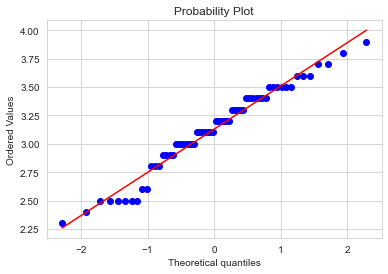

In [130]:
#GPA
stats.probplot( DF_Continuous.GPA ,dist = "norm" , plot = pylab)
pylab.show()

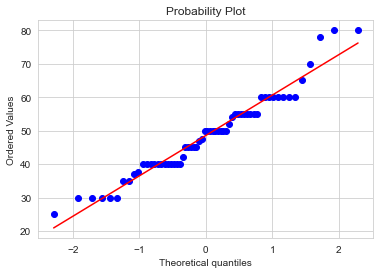

In [131]:
stats.probplot( DF_Continuous.Salary ,dist = "norm" , plot = pylab)
pylab.show()

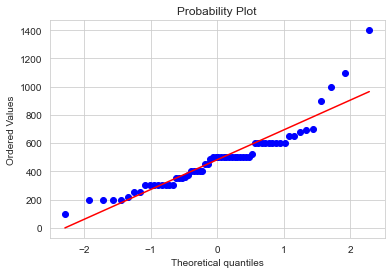

In [132]:
stats.probplot( DF_Continuous.Spending ,dist = "norm" , plot = pylab)
pylab.show()

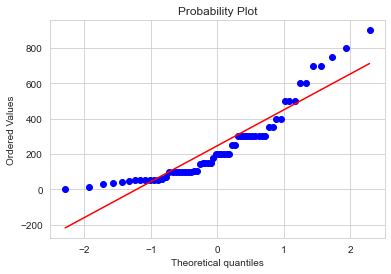

In [133]:
stats.probplot( DF_Continuous['Text Messages'] ,dist = "norm" , plot = pylab)
pylab.show()

##### Chi-Square Test for Normality

Here we assume alpha = 0.05. 

H(0) = The distribution is normally distributed  
H(1) = The distribution is not normally distributed

If, 

p-value <= 0.05 (We reject null hypothesis => Not normal dist)

p-value > 0.05 (We don't have enough evidence to reject H(0) => Normal dist)

In [134]:
# Chi-Square test for GPA
GPA_CHI = Student_DF[["GPA"]]

In [135]:
statistic,pvalue = chisquare(GPA_CHI)
print('statistic=%.3f , p=%.3f\n' % (statistic,pvalue))
if pvalue>0.05 :
    print('GPA follows normal distribution')
else :
    print('GPA does not follow normal distribution')

statistic=2.776 , p=1.000

GPA follows normal distribution


In [136]:
# Chi-Square test for Salary

Salary_CHI = Student_DF[["Salary"]]
statistic,pvalue = chisquare(Salary_CHI)
print('statistic=%.3f , p=%.3f\n' % (statistic,pvalue))
if pvalue>0.05 :
    print('Salary follows normal distribution')
else :
    print('Salary does not follow normal distribution')

statistic=183.381 , p=0.000

Salary does not follow normal distribution


In [137]:
# Chi-Square test for Spending

Spending_CHI = Student_DF[["Spending"]]
statistic,pvalue = chisquare(Spending_CHI)
print('statistic=%.3f , p=%.3f\n' % (statistic,pvalue))
if pvalue>0.05 :
    print('Spending follows normal distribution')
else :
    print('Spending does not follow normal distribution')

statistic=6234.383 , p=0.000

Spending does not follow normal distribution


In [138]:
# Chi-Square test for Text Messages

Text_CHI = Student_DF[["Text Messages"]]
statistic,pvalue = chisquare(Text_CHI)
print('statistic=%.3f , p=%.3f\n' % (statistic,pvalue))
if pvalue>0.05 :
    print('Text Messages follows normal distribution')
else :
    print('Text Messages does not follow normal distribution')

statistic=11395.711 , p=0.000

Text Messages does not follow normal distribution


# Problem 3 ---- ABC asphalt shingles dataset

In [139]:
shingles_DF = pd.read_csv(r"C:\Users\adisr\Downloads\A+&+B+shingles.csv")

In [140]:
shingles_DF.head()

,A,B,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,0.44,0.14,NaN,NaN,NaN,NaN
1,0.61,0.15,NaN,NaN,NaN,NaN
2,0.47,0.31,NaN,NaN,NaN,NaN
3,0.30,0.16,NaN,NaN,NaN,NaN
4,0.15,0.37,NaN,NaN,NaN,NaN


In [141]:
# Selecting only relevant columns
shingles_DF = shingles_DF[["A", "B"]]
shingles_DF.head(3)

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31


In [142]:
shingles_DF.count()

A    36
B    31
dtype: int64

In [143]:
# As the lengths of each column i.e, counts appear to be different, let us check for missing values.

shingles_DF.isna().sum()

A    0
B    5
dtype: int64

### SOLUTION 3.1

In [144]:
# Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? 
# State your conclusions clearly showing all steps.

Defining out hypotheses:
    
(H0) : mean moisture (mu) <= 0.35
    
(H1) : mean moisture (mu) > 0.35


In [145]:
# Acoording to the problem statement, the max-threshold for moisture on 0.35 and the min-threshold is 0.
# This needs to be tested for each shingle type. 
# Since we are working with one shingle type at a time. We will perform a 1 sample t-test. 

# We assume our alpha level of significance = 5%

In [146]:
# Solving for shingle A

t_statistic, p_value = ttest_1samp(shingles_DF.A, 0.35)
print("Shingle 'A' \n t-statistic: {0} \n p-value: {1} ".format(t_statistic, p_value/2))  

Shingle 'A' 
 t-statistic: -1.4735046253382782 
 p-value: 0.07477633144907513 


p-value > 0.05 implies that we accept H(0) at α = 0.05 level of significance.

As the probability value falls into the acceptance region, we fail to rejet H(0) (mu) <= 0.35

This means that for Type A, the mean moisture content is within the threshold limits.

In [147]:
# Solving for shingle B

t_statistic, p_value = ttest_1samp(shingles_DF.B, 0.35,nan_policy='omit') # as type B has 5 missing values
print("Shingle 'A' \n t-statistic: {0} \n p-value: {1} ".format(t_statistic, p_value/2)) 

Shingle 'A' 
 t-statistic: -3.1003313069986995 
 p-value: 0.0020904774003191826 


p-value< 0.05 alpha. 
We reject H(0), and accept H(1) at α = 0.05 level of significance.

This means that the mean moisture level in Type B is greater than 0.35. 

### SOLUTION 3.2

In [148]:
# 3.2 Do you think that the population mean for shingles A and B are equal? 
# Form the hypothesis and conduct the test of the hypothesis. 
# What assumption do you need to check before the test for equality of means is performed?

H(0): μ(A) = μ(B)

H(1) : μ(A) != μ(B)


Let the level of significance be α = 0.05.

In [149]:
t_statistic,p_value = ttest_ind(shingles_DF['A'],shingles_DF['B'],equal_var=True ,nan_policy='omit')  

print("t-2 sample test \nt_statistic = {} \npvalue = {}".format(round(t_statistic,3),round(p_value,3)))

t-2 sample test 
t_statistic = 1.29 
pvalue = 0.202


As the Probability value > 0.05, we fail to reject H(0).

This means that both shingle means are equal. 

Before the test for equality of means is performed we check if the samples have teh same variance and are normally distributed. 